In [21]:
%matplotlib inline

import pandas
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import KFold
import numpy as np
import matplotlib.pyplot as plt

Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score). Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).

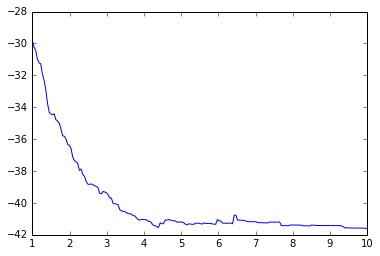

array([  1.       , -29.8040208])

In [26]:
boston = sklearn.datasets.load_boston()
kf = KFold(len(boston.data), n_folds=5, random_state=42, shuffle=True)
results = []

for p in np.linspace(1, 10, 200, endpoint=True):    
    neigh = KNeighborsRegressor(n_neighbors=5, weights="distance", metric="minkowski", p=p)
    score = np.average(sklearn.cross_validation.cross_val_score(neigh, boston.data, boston.target, scoring="mean_squared_error", cv=kf))
    results.append([p, score])
    
results = np.array(results)
plt.plot(results[:,0], results[:,1])
plt.show()
results[0]
